### Import Libraries

In [19]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### Load datasets

In [20]:
movies = pd.read_csv("movies_metadata.csv", low_memory=False)
ratings = pd.read_csv("ratings.csv")

### Display dataset info and preview the datasets

In [21]:
print("Movies dataset info:")
print(movies.info())
print("Ratings dataset info:")
print(ratings.info())

print("Movies dataset preview:")
print(movies.head())
print("Ratings dataset preview:")
print(ratings.head())

Movies dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-

### Visualization

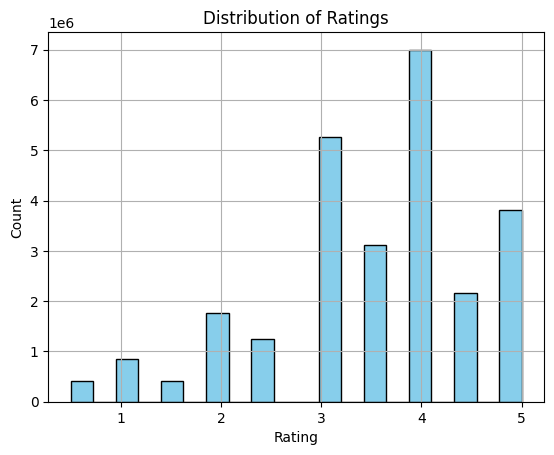

In [22]:
ratings['rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### Simplify movie IDs for easy use

In [23]:
movies = movies[movies['id'].str.isdigit()]
movies['id'] = movies['id'].astype(int)

### Basic Recommendation Function and providing recommendations for a user

In [24]:
def recommend_top_movies(user_id, num_recommendations=7):
    # Find movies rated by the user
    user_ratings = ratings[ratings['userId'] == user_id]
    rated_movie_ids = user_ratings['movieId'].unique()

    # Find the most popular movies not rated by the user
    unrated_movies = ratings[~ratings['movieId'].isin(rated_movie_ids)]
    popular_movies = unrated_movies.groupby('movieId').size().sort_values(ascending=False).head(num_recommendations)

    # Get movie details
    recommended_movie_ids = popular_movies.index
    recommendations = movies[movies['id'].isin(recommended_movie_ids)]

    return recommendations[['title']]
    
user_id = 1
recommendations = recommend_top_movies(user_id, num_recommendations=7)

print("Best Recommended Movies are:", recommendations)

Best Recommended Movies are:                                    title
938                         The 39 Steps
3382                             Solaris
4020            The Million Dollar Hotel
5004                     Monsoon Wedding
6388  Terminator 3: Rise of the Machines
